In [ ]:
!pip install opencv-python

In [1]:
import cv2
import imghdr
import os
data_dir = 'data'
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\normal\107-p48.jpg
Image not in ext list data\normal\148112-dry-eye.webp
Image not in ext list data\normal\coloboma-eye-pupil-defect.jpg
Image not in ext list data\normal\human-eye-healthy-dry-normal-600w-2108758157.jpg
Image not in ext list data\normal\small-pupils-678x446.gif
Image not in ext list data\normal\vector-illustration-normal-human-eyes-600w-1146198653.jpg
Image not in ext list data\normal\vector10.svg
Image not in ext list data\normal\vector11.svg
Image not in ext list data\normal\vector12.svg
Image not in ext list data\normal\vector13.svg
Image not in ext list data\normal\vector2.svg
Image not in ext list data\normal\vector3.svg
Image not in ext list data\normal\vector4.svg
Image not in ext list data\normal\vector5.svg
Image not in ext list data\normal\vector6.svg
Image not in ext list data\normal\vector7.svg
Image not in ext list data\normal\vector8.svg
Image not in ext list data\normal\vector9.svg
Image not in ext list data\Pterygium_Clean\pin

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory('data')

Found 441 files belonging to 2 classes.


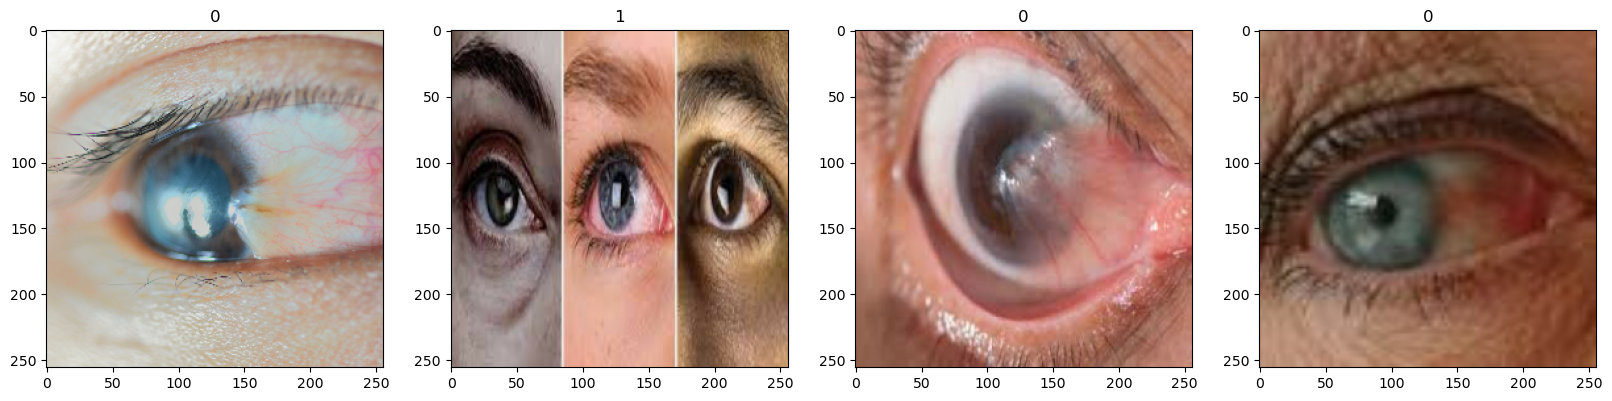

In [6]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [8]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15
9/9 [==============================] - 5s 414ms/step - loss: 0.9420 - accuracy: 0.5382 - val_loss: 0.6344 - val_accuracy: 0.6250
Epoch 2/15
9/9 [==============================] - 4s 401ms/step - loss: 0.6120 - accuracy: 0.6701 - val_loss: 0.5713 - val_accuracy: 0.6562
Epoch 3/15
9/9 [==============================] - 4s 395ms/step - loss: 0.6084 - accuracy: 0.6597 - val_loss: 0.5440 - val_accuracy: 0.7656
Epoch 4/15
9/9 [==============================] - 4s 406ms/step - loss: 0.5587 - accuracy: 0.7431 - val_loss: 0.5442 - val_accuracy: 0.7031
Epoch 5/15
9/9 [==============================] - 4s 390ms/step - loss: 0.4728 - accuracy: 0.7674 - val_loss: 0.4516 - val_accuracy: 0.8125
Epoch 6/15
9/9 [==============================] - 4s 393ms/step - loss: 0.4596 - accuracy: 0.7882 - val_loss: 0.3742 - val_accuracy: 0.8750
Epoch 7/15
9/9 [==============================] - 4s 381ms/step - loss: 0.4364 - accuracy: 0.7951 - val_loss: 0.4420 - val_accuracy: 0.8281
Epoch 8/15
9/9 [====

In [9]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 131ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9230769, shape=(), dtype=float32) tf.Tensor(0.96875, shape=(), dtype=float32)


In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
img = cv2.imread('Pterygium-2-SMALL.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5: 
    print(f'Predicted class is Surfer')
else:
    print(f'Predicted class normal')

In [ ]:
model.save_weights('model.h5')